In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [7]:
# Problem 1

def Newton(f, x0, f_prime, tol = 1e-5, max_iter = 15):
    i = 0
    x = x0
    converge = False
    while i < max_iter:
        next_x = x - f(x) / f_prime(x)
        if abs(next_x - x) < tol:
            converge = True
            break
        i += 1
        x = next_x
    return next_x, converge

f  = lambda x: np.exp(x) - 2
f_prime = lambda x: np.exp(x)

g = lambda x: x**4 - 3
g_prime = lambda x: 4*x**3

print(Newton(f, 0, f_prime))
print(Newton(g, 1, g_prime))

(0.6931471805600254, True)
(1.3160740129543826, True)


In [37]:
# Problem 3

def Newton_backtracking(f, x0, f_prime, tol = 1e-5, max_iter = 15, α = 1):
    i = 0
    x = x0
    converge = False
    while i < max_iter:
        next_x = x - α * f(x) / f_prime(x)
        if abs(next_x - x) < tol:
            converge = True
            break
        i += 1
        x = next_x
    return next_x, converge, i # keep track of number of iterations to use in the next problem.

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: 1/3 * np.power(np.abs(x), -2./3)

print(Newton_backtracking(f, 0.1, f_prime))
print(Newton_backtracking(f, 0.1, f_prime, α = 0.4))

(-3276.7999999999897, False, 15)
(0.09999970000000001, True, 0)


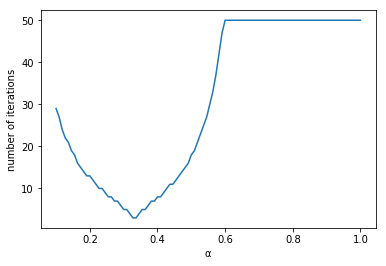

In [49]:
# Problem 4

def effect_of_α(f, x0, f_prime, N, tol = 1e-5, max_iter = 15):
    '''generate N α within the range of 0 to 1'''
    αs = np.linspace(1e-1, 1, N) # if alpha is set too near to 0, then the Newton shows convergence in 0 iteration, 
                                 # but it is not a true convergence to the answer, 
                                 # only because we are substracting a too small number from the current x.
    iterations = []
    for i in αs:
        iteration = Newton_backtracking(f, x0, f_prime, tol = tol, max_iter = max_iter, α = i)[2]
        iterations.append(iteration)
    return αs, iterations

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: 1/3 * np.power(np.abs(x), -2./3)
result = effect_of_α(f, 1, f_prime, 100, tol = 1e-5, max_iter = 50)

plt.plot(result[0],result[1])
plt.xlabel('α')
plt.ylabel('number of iterations')
plt.show()


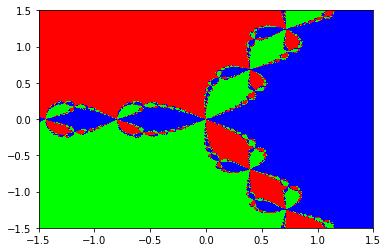

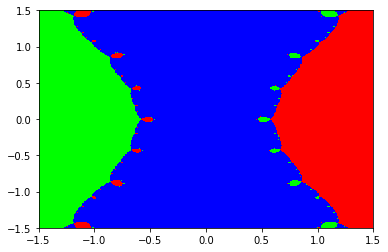

In [107]:
# Problem 7

def basins_of_attraction(f, f_prime, zeros, bounds, res, iters):
    zeros = np.array(zeros)
    rmin, rmax, imin, imax = bounds
    rr = np.linspace(rmin, rmax, res)
    ii = np.linspace(imin, imax, res)
    R, I = np.meshgrid(rr, ii)
    X0 = R + I * 1j
    X = X0
    
    for i in range(iters):
        nextX = X - f(X) / f_prime(X)
        X = nextX   
    Y = np.zeros_like(X, dtype = 'int64')
    
    for i in range(res):
        for j in range(res):
            Y[i][j] = np.argmin(abs(zeros - X[i][j]))
            
    plt.pcolormesh(R, I, Y, cmap = 'brg')
    plt.show()

f = lambda x: x**3 - 1
f_prime = lambda x: 3*x**2
f_zeros = [1, -0.5 + 1j * np.sqrt(3) / 2, -0.5 - 1j * np.sqrt(3) / 2]
g = lambda x: x**3 - x
g_prime = lambda x: 3*x**2 - 1
g_zeros = [0, 1, -1]

bounds = (-1.5, 1.5, -1.5, 1.5)
res = 500
iters = 20

basins_of_attraction(f, f_prime, f_zeros, bounds, res, iters)
basins_of_attraction(g, g_prime, g_zeros, bounds, res, iters)